In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)


In [47]:
loan_data = pd.read_csv('Loan_Default.csv')

In [48]:
loan_data.head()

ID  year loan_limit             Gender approv_in_adv loan_type  \
0  24890  2019         cf  Sex Not Available         nopre     type1   
1  24891  2019         cf               Male         nopre     type2   
2  24892  2019         cf               Male           pre     type1   
3  24893  2019         cf               Male         nopre     type1   
4  24894  2019         cf              Joint           pre     type1   

  loan_purpose Credit_Worthiness open_credit business_or_commercial  \
0           p1                l1        nopc                  nob/c   
1           p1                l1        nopc                    b/c   
2           p1                l1        nopc                  nob/c   
3           p4                l1        nopc                  nob/c   
4           p1                l1        nopc                  nob/c   

   loan_amount  rate_of_interest  Interest_rate_spread  Upfront_charges  \
0       116500               NaN                   NaN              NaN   
1       206500               NaN                   NaN              NaN   
2       406500              4.56                0.2000            595.0   
3       456500              4.25                0.6810              NaN   
4       696500              4.00                0.3042              0.0   

    term Neg_ammortization interest_only lump_sum_payment  property_value  \
0  360.0           not_neg       not_int         not_lpsm        118000.0   
1  360.0           not_neg       not_int             lpsm             NaN   
2  360.0           neg_amm       not_int         not_lpsm        508000.0   
3  360.0           not_neg       not_int         not_lpsm        658000.0   
4  360.0           not_neg       not_int         not_lpsm        758000.0   

  construction_type occupancy_type Secured_by total_units   income  \
0                sb             pr       home          1U   1740.0   
1                sb             pr       home          1U   4980.0   
2                sb             pr       home          1U   9480.0   
3                sb             pr       home          1U  11880.0   
4                sb             pr       home          1U  10440.0   

  credit_type  Credit_Score co-applicant_credit_type    age  \
0         EXP           758                      CIB  25-34   
1        EQUI           552                      EXP  55-64   
2         EXP           834                      CIB  35-44   
3         EXP           587                      CIB  45-54   
4        CRIF           602                      EXP  25-34   

  submission_of_application        LTV Region Security_Type  Status  dtir1  
0                   to_inst  98.728814  south        direct       1   45.0  
1                   to_inst        NaN  North        direct       1    NaN  
2                   to_inst  80.019685  south        direct       0   46.0  
3                  not_inst  69.376900  North        direct       0   42.0  
4                  not_inst  91.886544  North        direct       0   39.0

In [49]:
loan_data.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')

In [50]:
loan_data['Status'].value_counts()

Status
0    112031
1     36639
Name: count, dtype: int64

In [51]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [52]:
loan_data.describe(include='object')

loan_limit  Gender approv_in_adv loan_type loan_purpose  \
count      145326  148670        147762    148670       148536   
unique          2       4             2         3            4   
top            cf    Male         nopre     type1           p3   
freq       135348   42346        124621    113173        55934   

       Credit_Worthiness open_credit business_or_commercial Neg_ammortization  \
count             148670      148670                 148670            148549   
unique                 2           2                      2                 2   
top                   l1        nopc                  nob/c           not_neg   
freq              142344      148114                 127908            133420   

       interest_only lump_sum_payment construction_type occupancy_type  \
count         148670           148670            148670         148670   
unique             2                2                 2              3   
top          not_int         not_lpsm                sb             pr   
freq          141560           145286            148637         138201   

       Secured_by total_units credit_type co-applicant_credit_type     age  \
count      148670      148670      148670                   148670  148470   
unique          2           4           4                        2       7   
top          home          1U         CIB                      CIB   45-54   
freq       148637      146480       48152                    74392   34720   

       submission_of_application  Region Security_Type  
count                     148470  148670        148670  
unique                         2       4             2  
top                      to_inst   North        direct  
freq                       95814   74722        148637

In [53]:
loan_data.nunique()

ID                           148670
year                              1
loan_limit                        2
Gender                            4
approv_in_adv                     2
loan_type                         3
loan_purpose                      4
Credit_Worthiness                 2
open_credit                       2
business_or_commercial            2
loan_amount                     211
rate_of_interest                131
Interest_rate_spread          22516
Upfront_charges               58271
term                             26
Neg_ammortization                 2
interest_only                     2
lump_sum_payment                  2
property_value                  385
construction_type                 2
occupancy_type                    3
Secured_by                        2
total_units                       4
income                         1001
credit_type                       4
Credit_Score                    401
co-applicant_credit_type          2
age                         

In [54]:
missing = loan_data.isnull().sum()
missing

ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_applic

In [55]:
len(missing[missing > 0])

14

Insights

- The dataset contains 34 columns, out of which 21 are categorical columns, and 13 are numerical columns. 
- There are 148670 rows in the dataset.
- Status is the target variable, where two classes of loan default status are shown. (0 - Not Defaulted, 1 - Defaulted)
- ID column contains identification numbers of each record.
- year has only one value, 2019. Our dataset is based on the loan records of year 2019.
- There are missing values in 14 columns, which will we need to handle in the next sections.

In [56]:
status = loan_data['Status'].value_counts()
status

Status
0    112031
1     36639
Name: count, dtype: int64

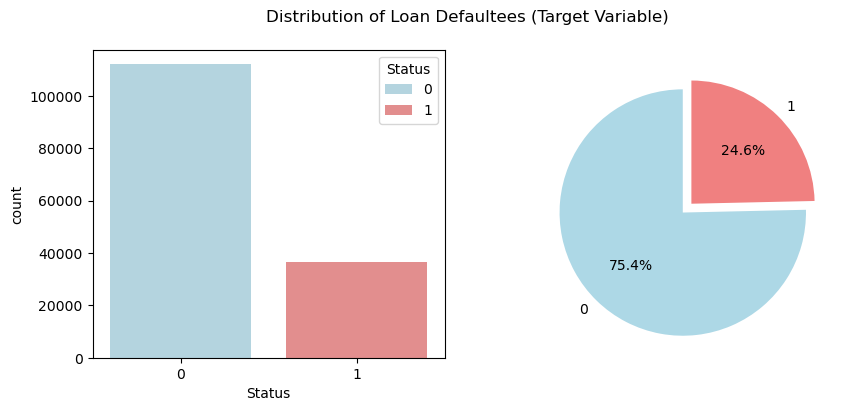

Percentage of defaulters is : 24.645%


In [57]:
status_counts = loan_data['Status'].value_counts()
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.countplot(data=loan_data, x='Status', hue = 'Status',  palette=['lightblue', 'lightcoral'])  
plt.subplot(1,2,2)
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=90, 
        colors=['lightblue', 'lightcoral'], explode = [0.1,0])
plt.suptitle('Distribution of Loan Defaultees (Target Variable)')

plt.show()

print(f"Percentage of defaulters is : {(loan_data['Status'].sum()/loan_data.shape[0])*100:.3f}%")

Insights

- The aim of this project is to build an ML model which can predict a debtor would default their loan or not. In our dataset, we observed that approximately 25% of borrowers have defaulted on their loans. This indicates that loan defaults are not uncommon, and a predictive model could provide substantial value to financial institutions by helping them identify high-risk borrowers early in the process.

In [58]:
cat_cols = [col for col in loan_data.columns if loan_data[col].dtype in ['object', 'category']]
num_cols = [col for col in loan_data.columns if loan_data[col].dtype in ['int64', 'float64']]

In [59]:
num_cols.remove('Status') # Target variable
num_cols.remove('ID') # ID will not contribute in the modeling
num_cols.remove('year') # The dataset contains only one value for year

num_cols_with_target = num_cols.copy()
num_cols_with_target.append('Status')

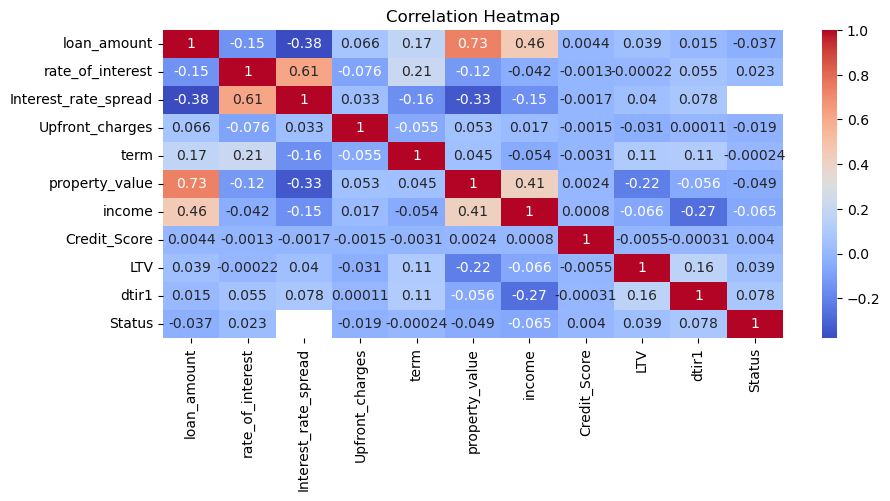

In [60]:
correlation = loan_data[num_cols_with_target].corr()
plt.figure(figsize=(10,4))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Pair Plots of Numerical Features

* Pair plots are useful for identifying relationships between numerical features, as they allow us to visualize how variables correlate with one another and the target variable. By analyzing these plots, we can spot trends, patterns, and potential outliers.

* The diagonal of the pair plot shows the distribution of individual numerical features.

* The off-diagonal plots show pairwise relationships between numerical features.

In [61]:
loan_data[num_cols_with_target]

loan_amount  rate_of_interest  Interest_rate_spread  Upfront_charges  \
0            116500               NaN                   NaN              NaN   
1            206500               NaN                   NaN              NaN   
2            406500             4.560                0.2000           595.00   
3            456500             4.250                0.6810              NaN   
4            696500             4.000                0.3042             0.00   
...             ...               ...                   ...              ...   
148665       436500             3.125                0.2571          9960.00   
148666       586500             5.190                0.8544             0.00   
148667       446500             3.125                0.0816          1226.64   
148668       196500             3.500                0.5824          4323.33   
148669       406500             4.375                1.3871          6000.00   

         term  property_value   income  Credit_Score        LTV  dtir1  Status  
0       360.0        118000.0   1740.0           758  98.728814   45.0       1  
1       360.0             NaN   4980.0           552        NaN    NaN       1  
2       360.0        508000.0   9480.0           834  80.019685   46.0       0  
3       360.0        658000.0  11880.0           587  69.376900   42.0       0  
4       360.0        758000.0  10440.0           602  91.886544   39.0       0  
...       ...             ...      ...           ...        ...    ...     ...  
148665  180.0        608000.0   7860.0           659  71.792763   48.0       0  
148666  360.0        788000.0   7140.0           569  74.428934   15.0       0  
148667  180.0        728000.0   6900.0           702  61.332418   49.0       0  
148668  180.0        278000.0   7140.0           737  70.683453   29.0       0  
148669  240.0        558000.0   7260.0           830  72.849462   44.0       0  

[148670 rows x 11 columns]

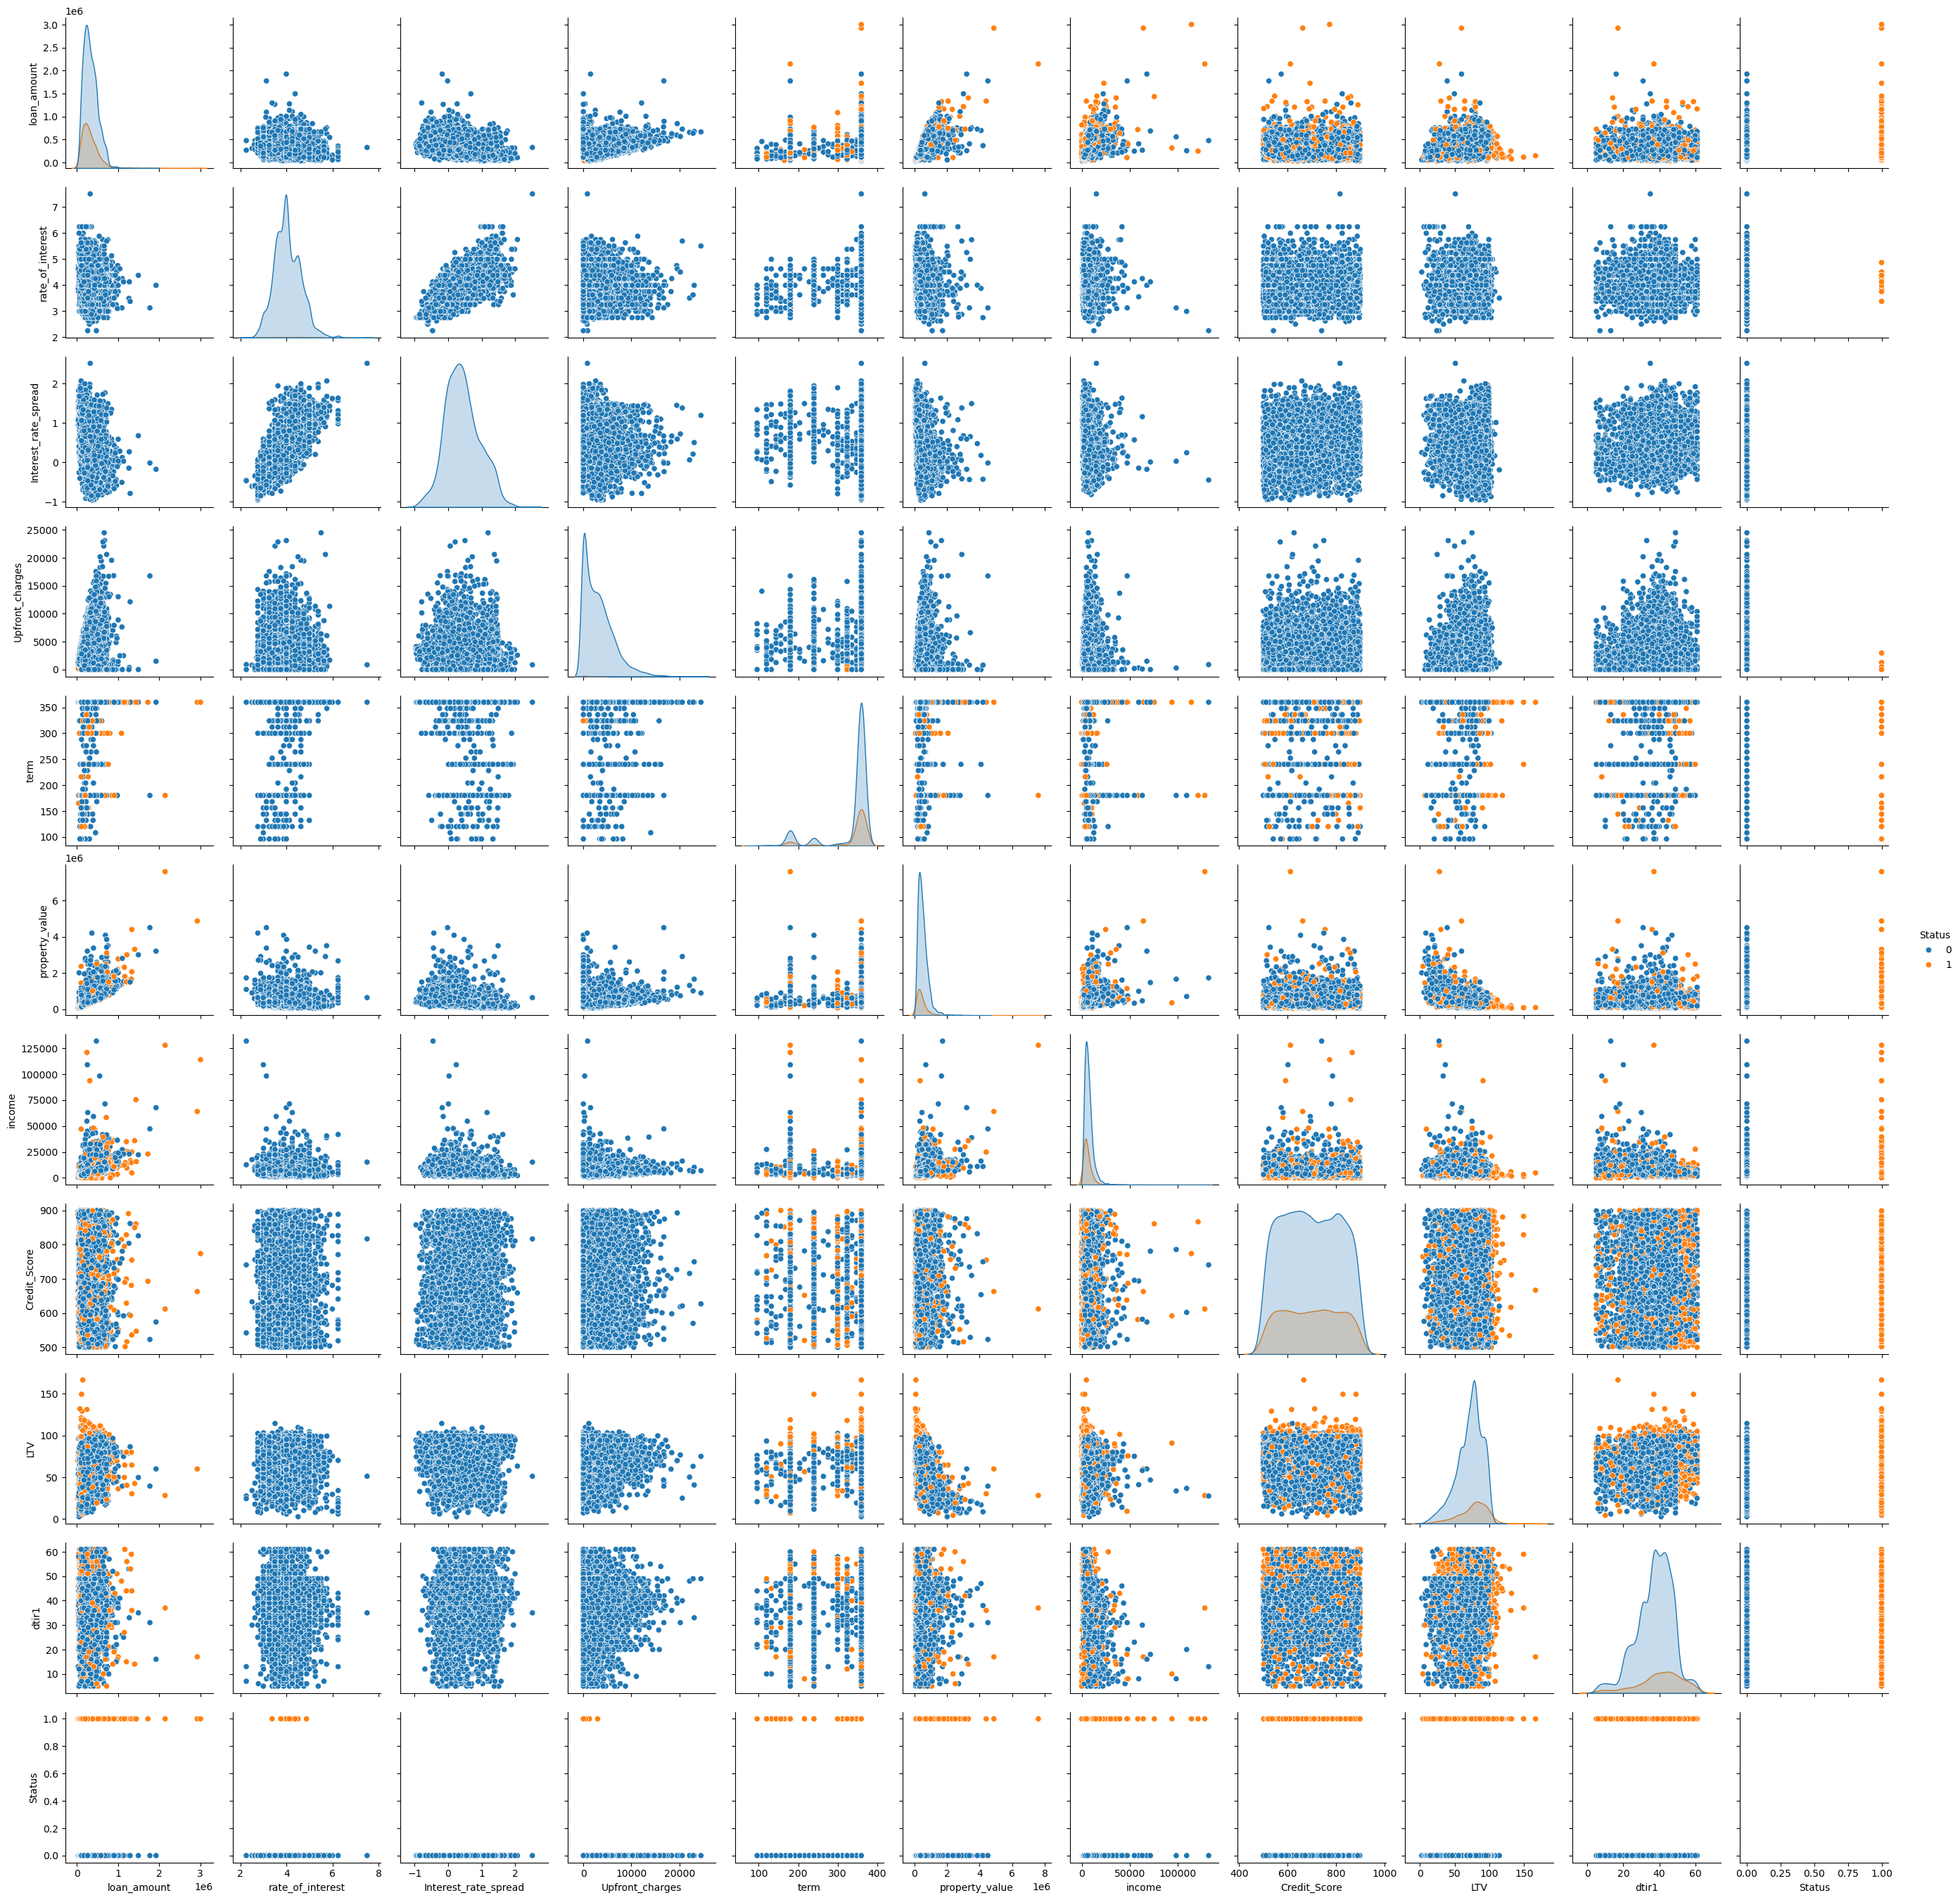

In [62]:
sns.pairplot(loan_data.sample(frac=0.05, random_state=42), hue='Status', vars=loan_data[num_cols_with_target])
plt.show()

Insights from Correlations and Pair Plots

- Numerical features in this dataset show not so much strong correlation with the target variable.
The top 5 correlated variables to 'Status' are:

* dtir1
* income
* property_value
* LTV
* loan_amount
* Interest_rate_spread does not show any correlation, but raises a NaN. More detailed anaylsis of this variable is needed.

- rate_of_interest and Interest_rate_spread are very much correlated.

- A noticable correlation is there between loan_amount, income, and property_value.
- rate_of_interest and Interest_rate_spread also shows strong correlation.
- Income and dtir1 shows a medium, negative correlation. Enlightens the fact that, more income having borrowers have lesser debt to income ratio.

Boxplots of Numerical Features

- We now visualize the numerical features on box plots with the corresponding target variable. Box plots are great for identifying outliers and understanding the spread and variability of the data within each group as well as the relationship between each numerical features and the target variable.

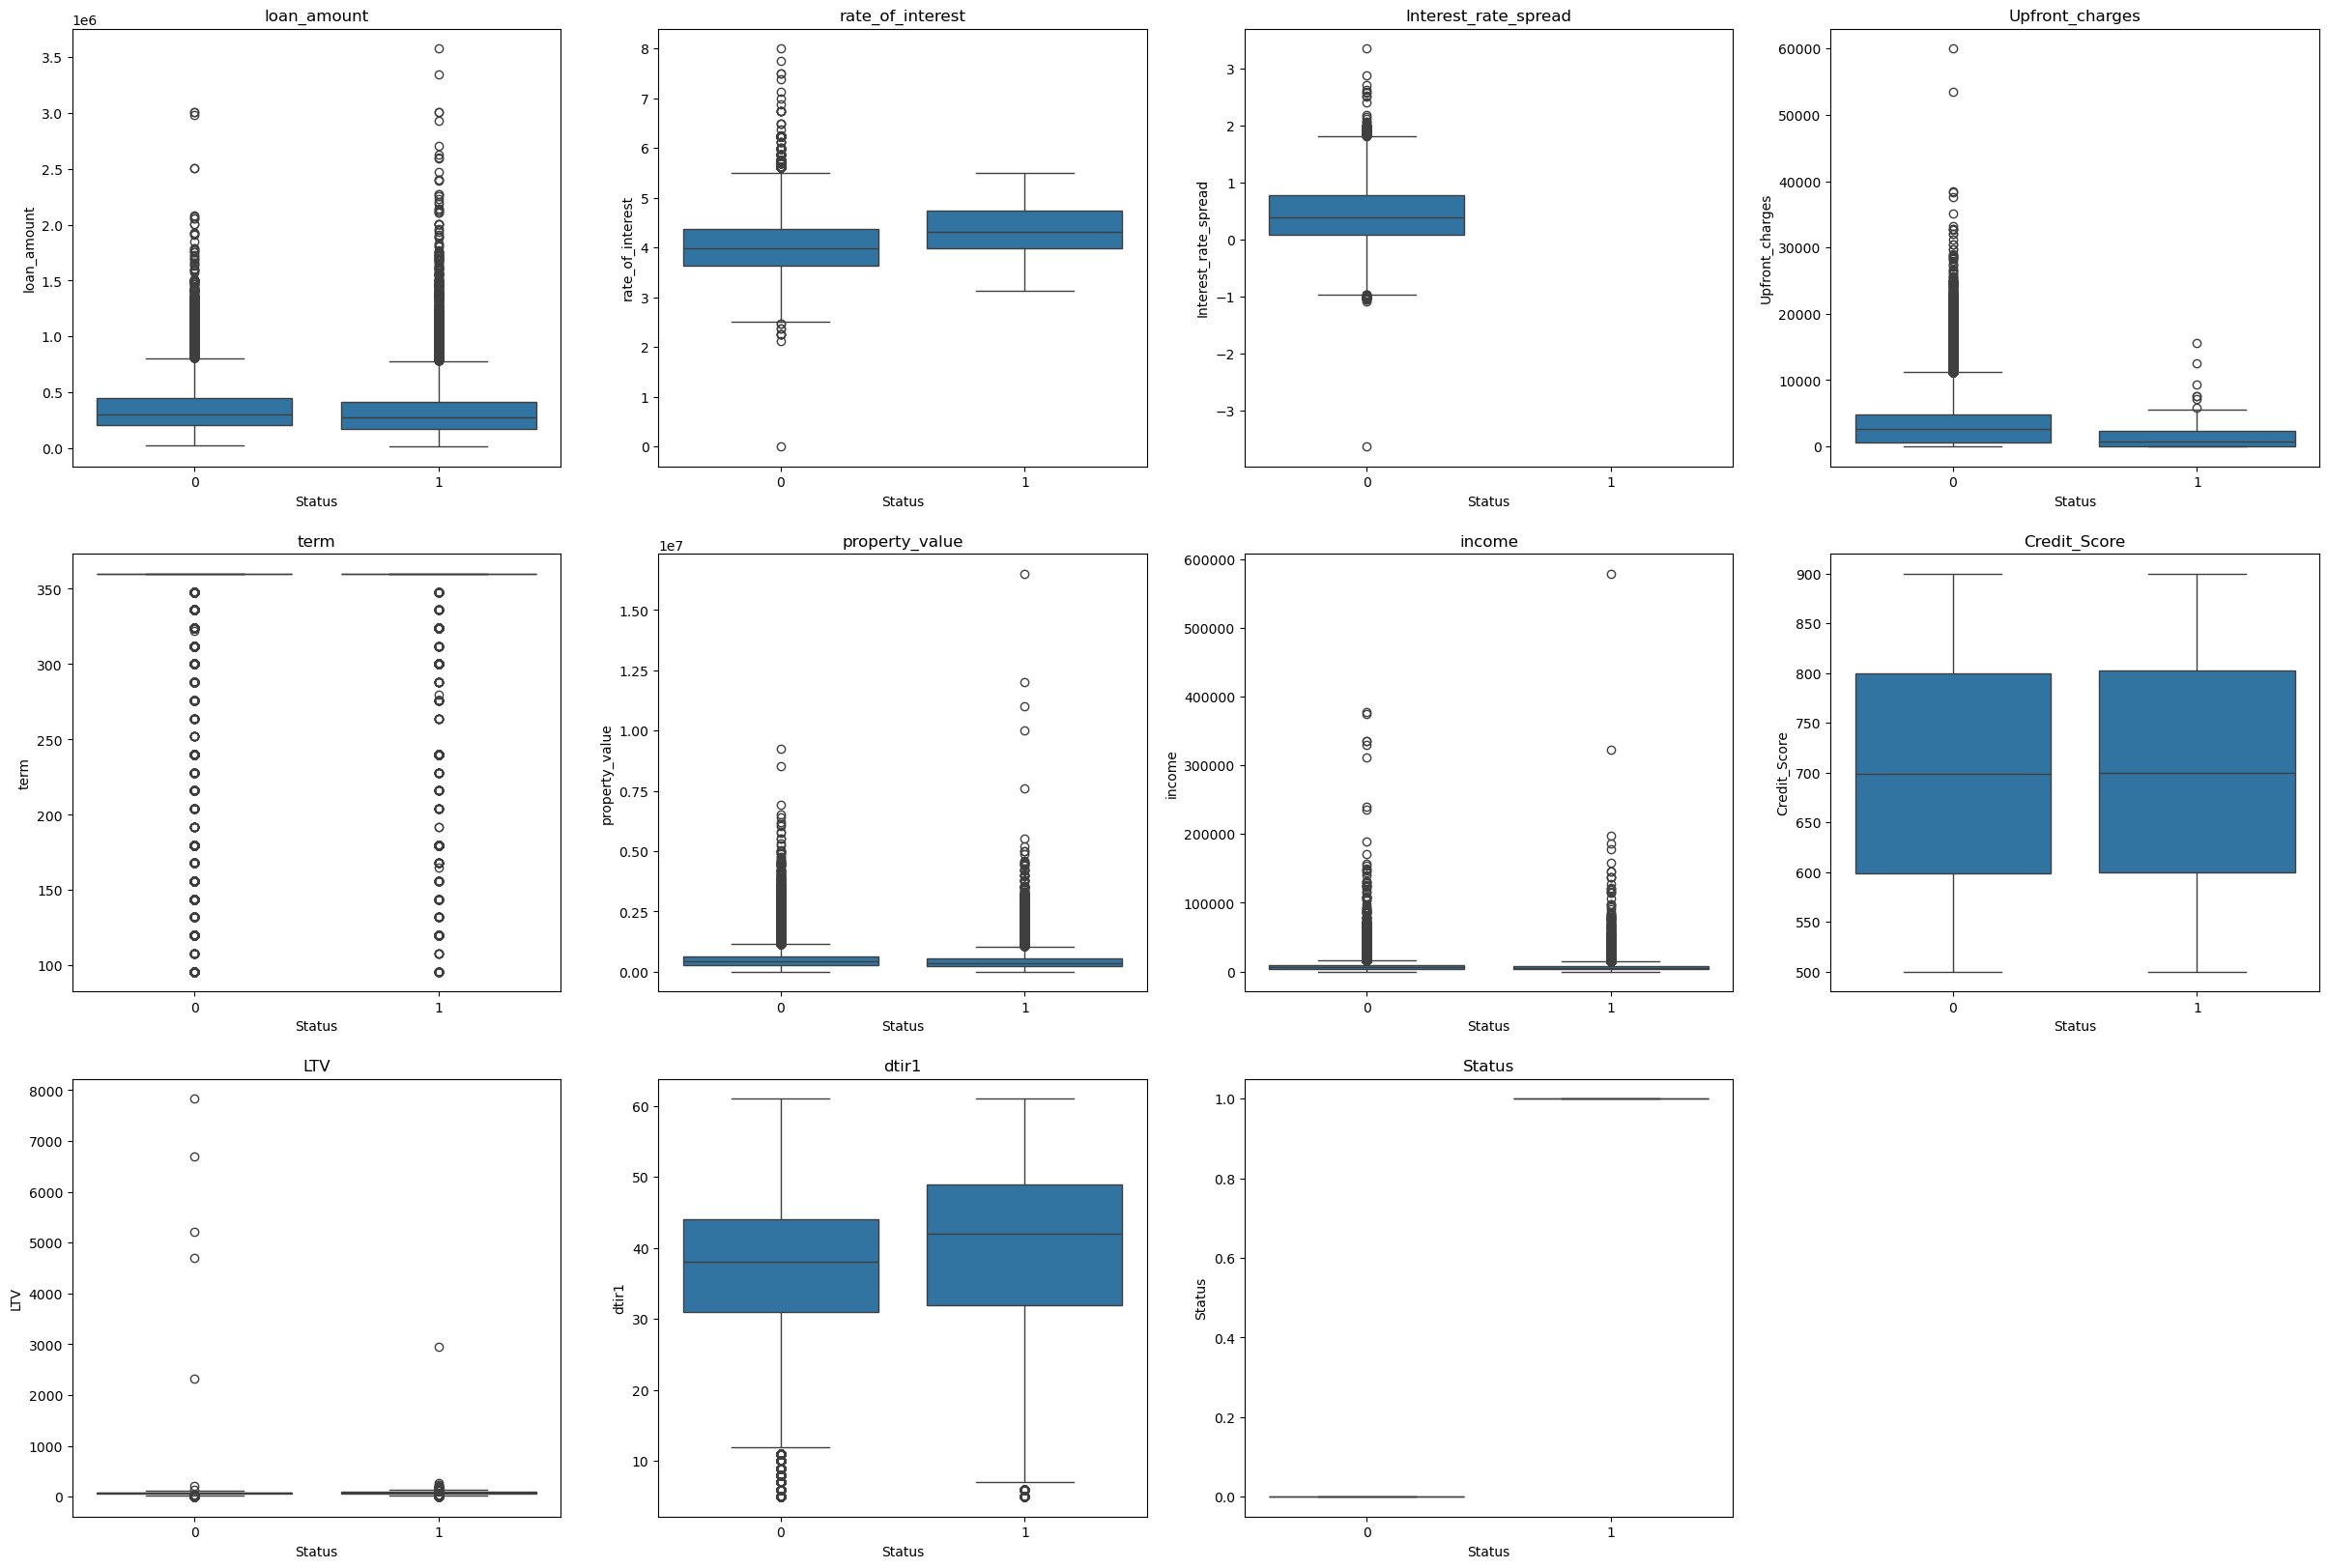

In [63]:
plt.figure(figsize=(30, 20))
for i, col in enumerate(num_cols_with_target):
    plt.subplot(3, 4, i+1)
    sns.boxplot(data=loan_data, x='Status', y=col)
    plt.title(col)

Some Insights from Box Plots

- the loan amount plot doesn't reveal any significant insight
- the rate of interest plot shows a significant difference in the median rate of interest for defaulters and non-defaulters and needs to be investigated
- the interest rate of spread does not have any record for defaulted loans and handling the its missing values will introduce bias, so we will drop it
- the upfront charges have lesser mean for defualted loans which is counterintuitive but fitting GLMs may capture trends in different part of its values
- higher values of dtir1 (debt to income ratio) are associated with defaulters
- LTV has some outliers and we may look to remove these loans y winsorizing their values

In [64]:
loan_data.groupby('Status')[num_cols].agg(['count', 'mean'])

loan_amount                rate_of_interest            \
             count           mean            count      mean   
Status                                                         
0           112031  334990.774875           112031  4.044931   
1            36639  319275.184912              200  4.350500   

       Interest_rate_spread           Upfront_charges                 term  \
                      count      mean           count         mean   count   
Status                                                                       
0                    112031  0.441656          108875  3227.328554  112005   
1                         0       NaN             153  1565.237974   36624   

                   property_value                 income               \
              mean          count           mean   count         mean   
Status                                                                  
0       335.144592         112029  505606.066286  104120  7204.014214   
1       335.112085          21543  457786.009377   35400  6231.806780   

       Credit_Score                 LTV              dtir1             
              count        mean   count       mean   count       mean  
Status                                                                 
0            112031  699.523793  112029  72.064757  104220  37.369267  
1             36639  700.600344   21543  76.291468   20329  39.597324

In [65]:
loan_data.groupby('Status')['rate_of_interest'].agg(['count', 'mean'])

count      mean
Status                  
0       112031  4.044931
1          200  4.350500

In [66]:
loan_data.groupby('Status')['Interest_rate_spread'].agg(['count', 'mean'])

count      mean
Status                  
0       112031  0.441656
1            0       NaN

In [67]:
loan_data.drop(columns=('Interest_rate_spread'), inplace=True)
num_cols.remove('Interest_rate_spread')
num_cols_with_target.remove('Interest_rate_spread')

In [68]:
outlier_ltvs = loan_data[loan_data['LTV'] > 300]['ID'].values
loan_data = loan_data[~loan_data['ID'].isin(outlier_ltvs)]

- Removed outlier LTV values > 300
- removed Interest Rate Spread Variable
- Rate of Interest has only 200 values for present for defaulted loans and handling of missing values here will introduce bias


Now we look at count plots of target with object/categorical variables

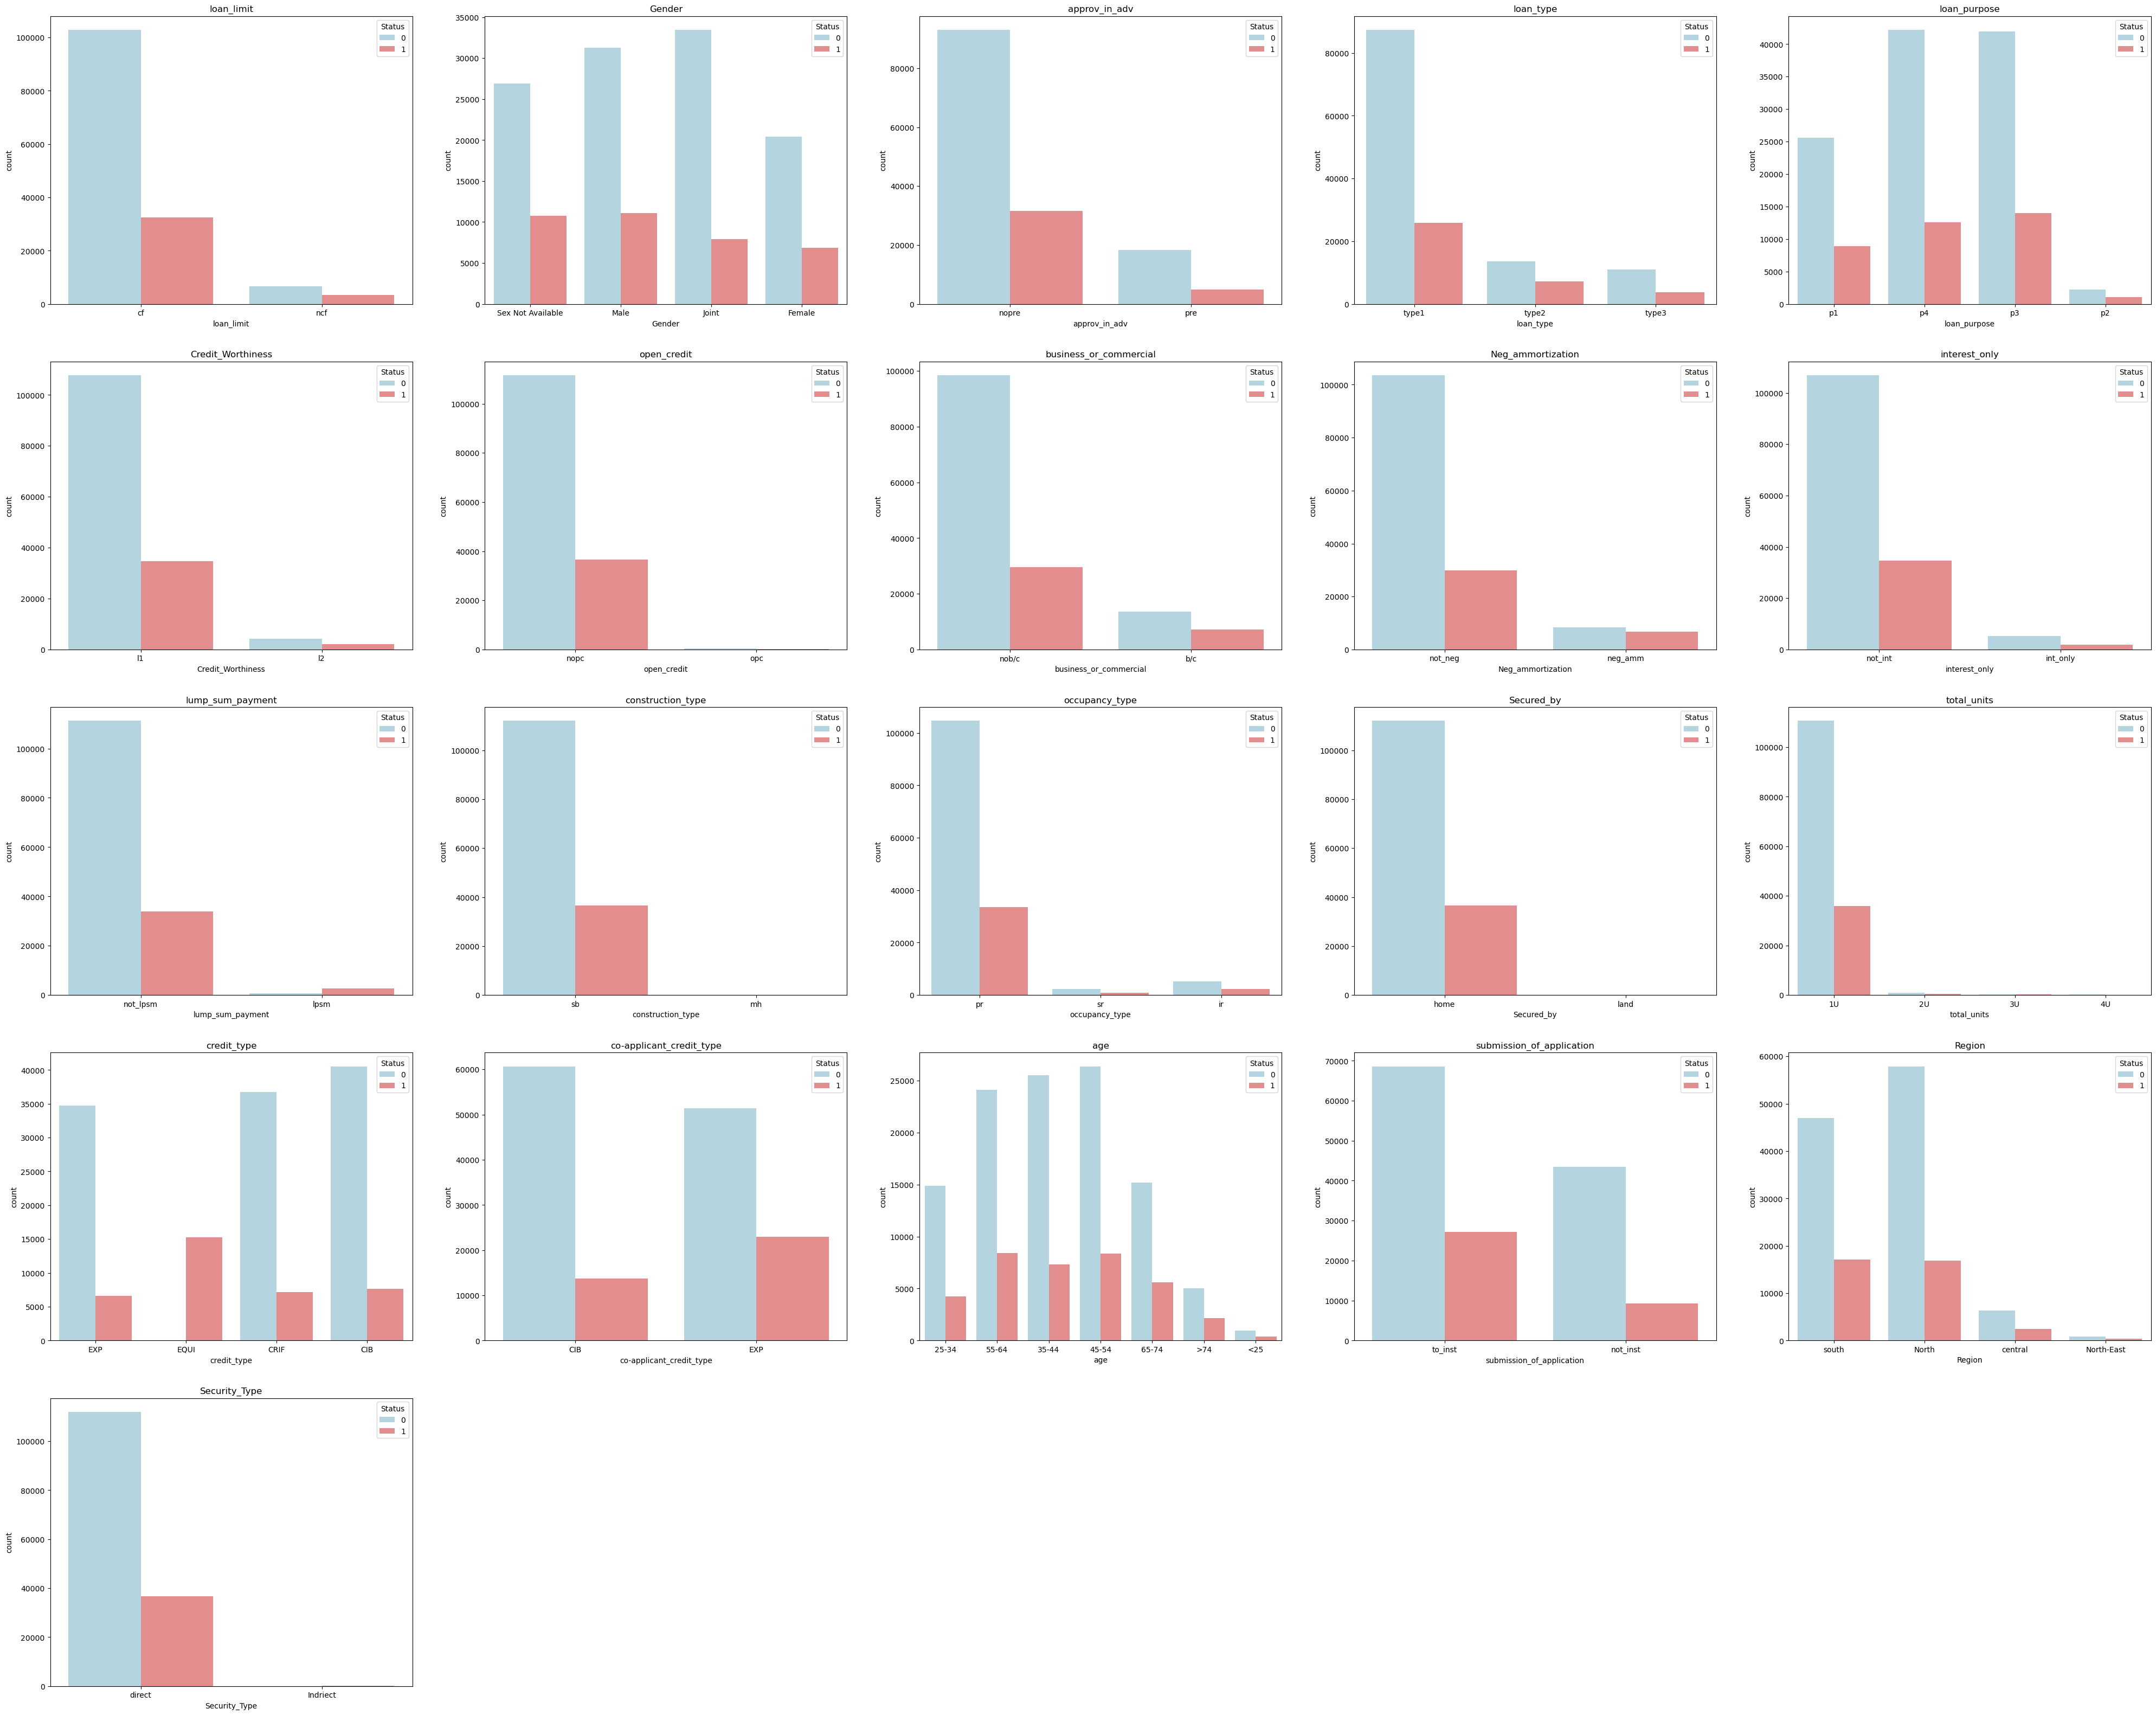

In [69]:
plt.figure(figsize=(50, 40))
for i, col in enumerate(cat_cols):
    plt.subplot(5, 5, i+1)
    sns.countplot(data=loan_data, x=col, hue='Status', palette=['lightblue', 'lightcoral'])
    plt.title(col)

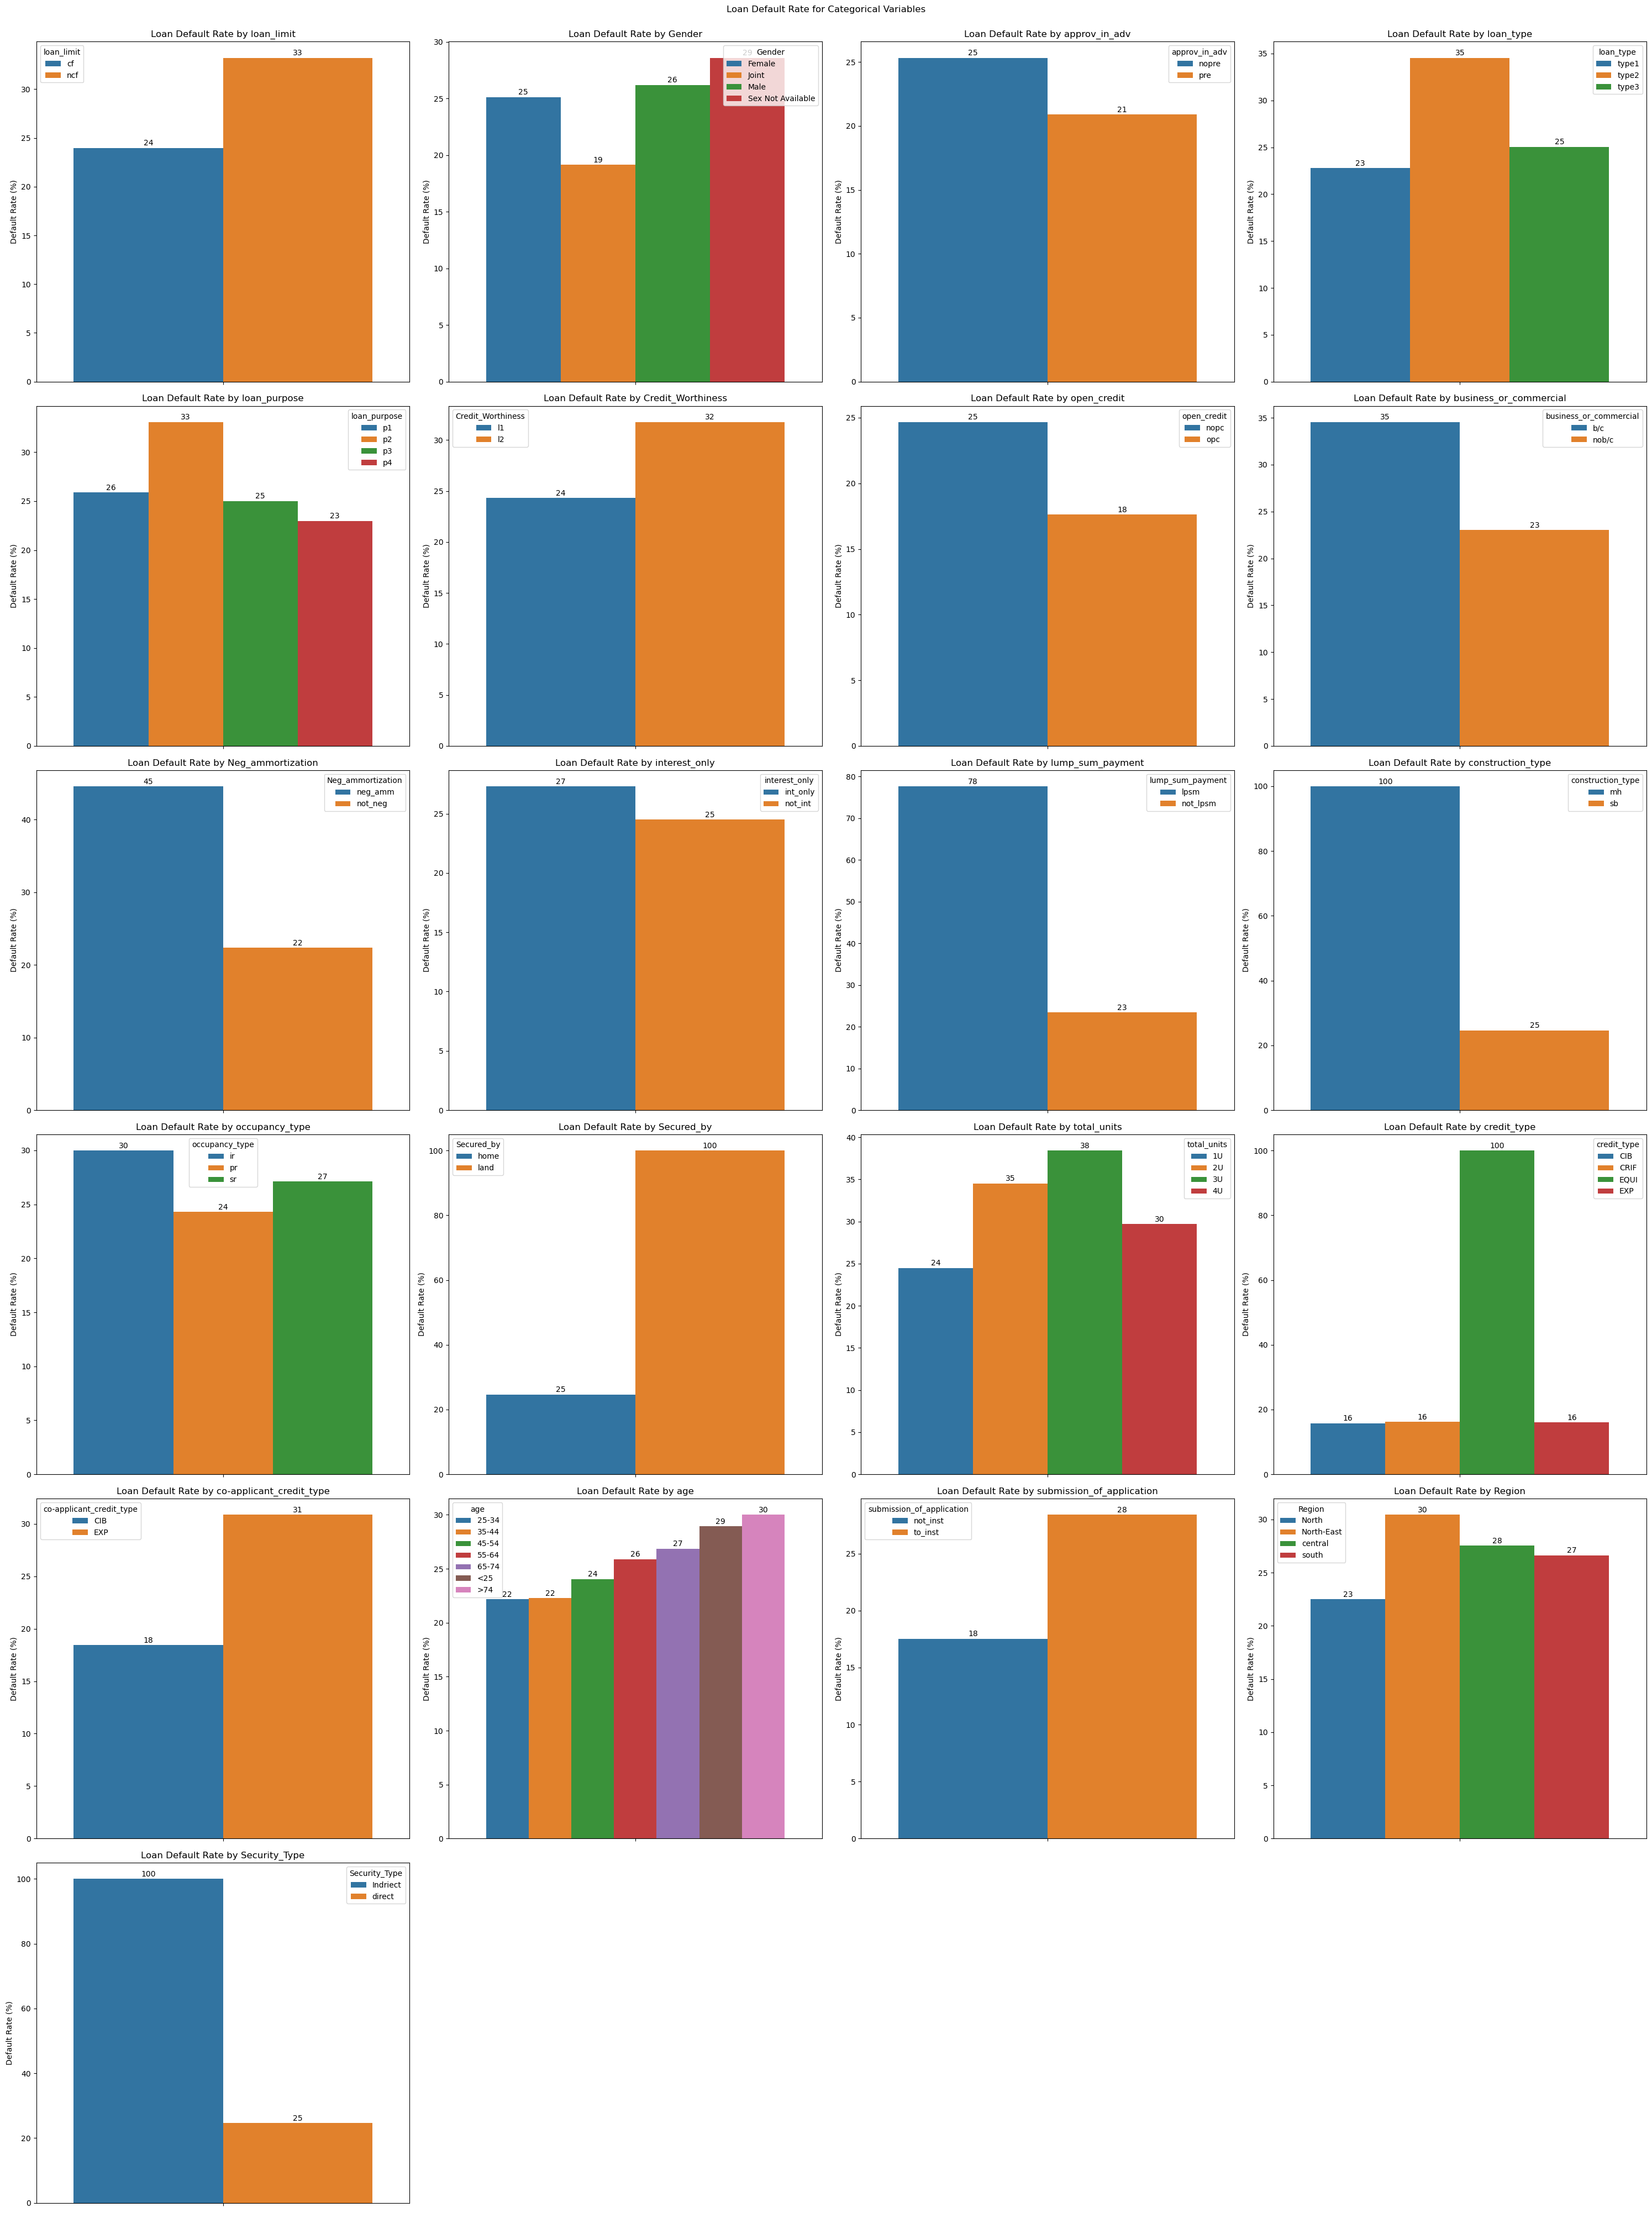

In [70]:
# Visualizing loan default rates across various categorical variables

plt.figure(figsize=(30, 40))
for i, col in enumerate(cat_cols, 1):
    
    default_rate = loan_data.groupby(col)['Status'].mean() * 100
    plt.subplot(6,4, i)
    ax = sns.barplot(hue = default_rate.index, y = default_rate.values, legend=True)
    # Add labels to all bars
    for container in ax.containers:
        ax.bar_label(container, fmt='%.0f', padding=1, fontsize=10)
    plt.title(f"Loan Default Rate by {col}")
    plt.ylabel("Default Rate (%)")
    plt.xticks(rotation=45)
plt.suptitle("Loan Default Rate for Categorical Variables", y=1)   
plt.tight_layout()
plt.show()

Visualizing both the count and default rate together for categorical variables

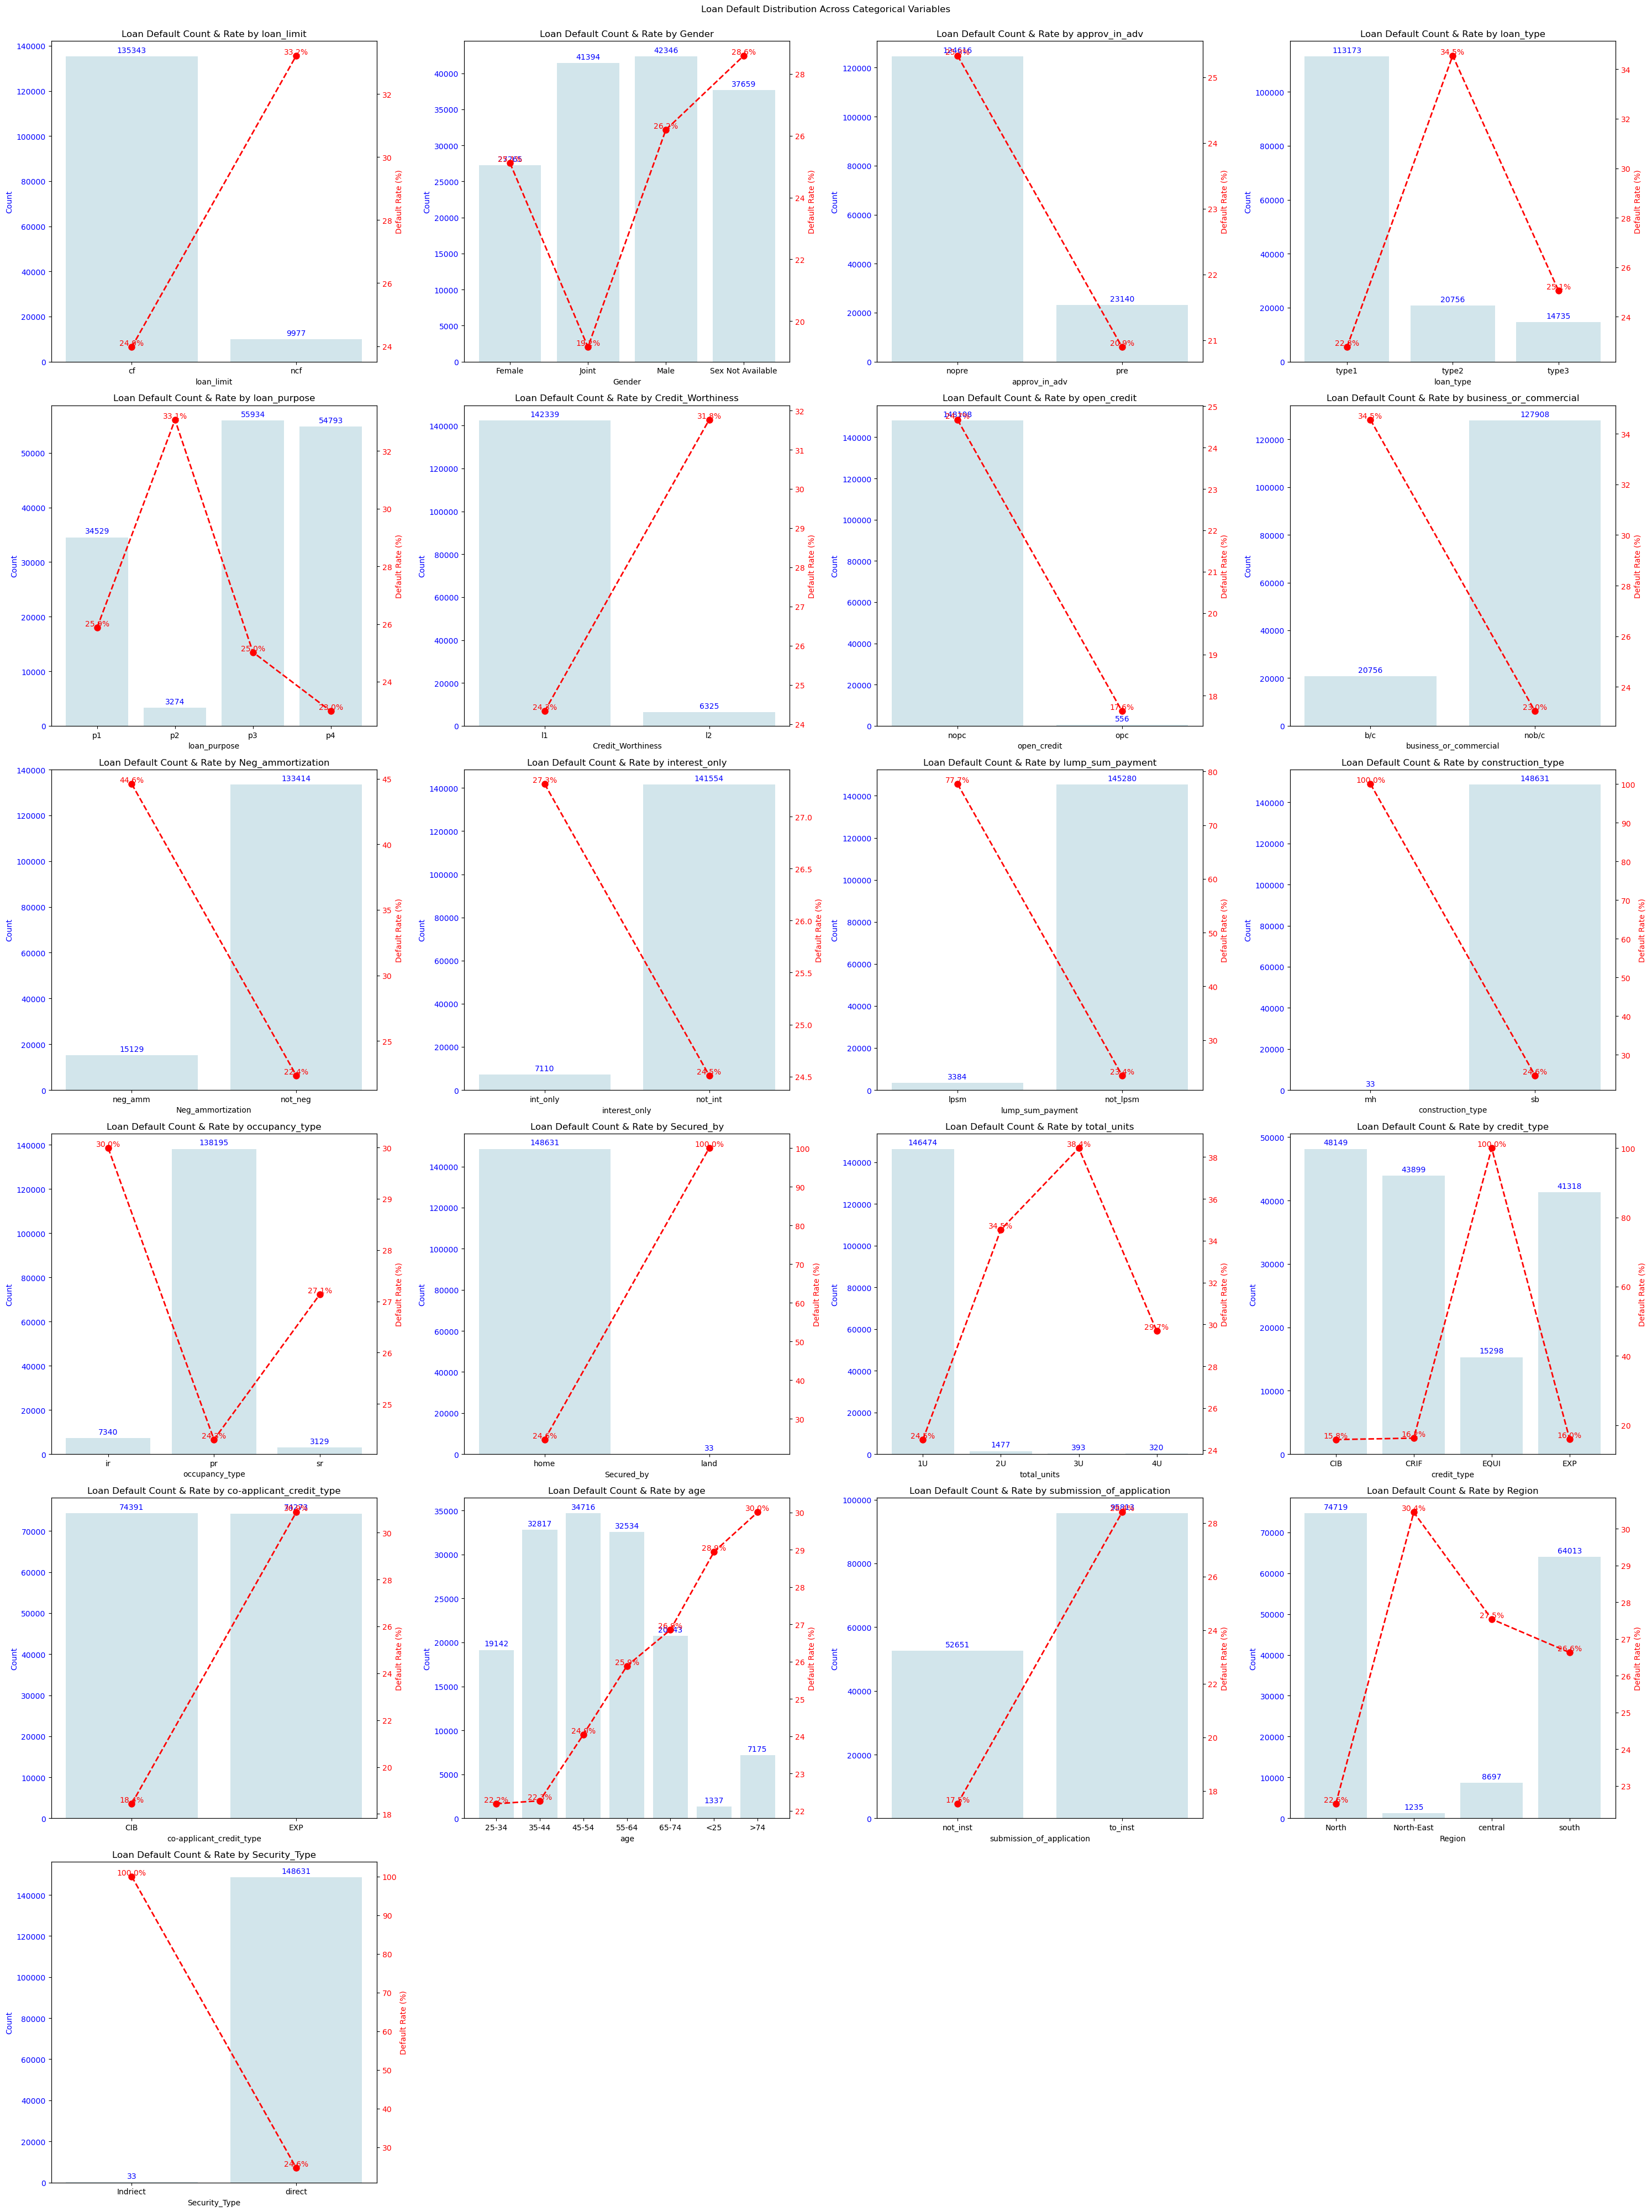

In [71]:
plt.figure(figsize=(30, 40))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(6, 4, i)
    
    # Compute count and mean default rate
    agg_data = loan_data.groupby(col)['Status'].agg(['count', 'mean'])
    default_rate = agg_data['mean'] * 100  # Convert to percentage

    # Create primary axis for count plot
    ax1 = sns.barplot(x=agg_data.index, y=agg_data['count'], color='lightblue', alpha=0.6)
    ax1.set_ylabel("Count", color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    # Create secondary axis for mean default rate
    ax2 = ax1.twinx()
    ax2.plot(agg_data.index, default_rate, color='red', marker='o', linestyle='dashed', linewidth=2, markersize=8)
    ax2.set_ylabel("Default Rate (%)", color='red')
    ax2.tick_params(axis='y', labelcolor='red')

    # Adding labels to bars
    for container in ax1.containers:
        ax1.bar_label(container, fmt='%d', padding=3, fontsize=10, color='blue')

    # Adding labels to line points
    for x, y in zip(agg_data.index, default_rate):
        ax2.text(x, y, f'{y:.1f}%', ha='center', va='bottom', fontsize=10, color='red')

    plt.title(f"Loan Default Count & Rate by {col}")
    plt.xticks(rotation=45)

plt.suptitle("Loan Default Distribution Across Categorical Variables", y=1)
plt.tight_layout()
plt.show()


Insights from all the plots for categorical variables - 

- For loan limit variable, higher default rate for ncf category despite lesser count
- for Gender, we have lowest defualt for joint category while Male default is higher than Female and approx 25% default observations don't have gender listed
- nopre in approval category has highest default rate
- highest default for type_2 loans
- highest default for p2 purpose loans despite the number of loans being issued being less
- l2 category also having highest default depite lesser count
- approx 50% (or 1 in 2 loans) defaulted if neg_amort was done for their loan
- approx 77% of the ~4000 loans that did lump sum payment defaulted
- even though there's a small sample of 33 loans of "mh" construct, it has 100% default rate
- occupancy status of IR (investor) has the highest default rate
- if credit type is EQUI, it has a 100% default rate
- co-applicant category of EXP is more likely to default than CIB
- loan default increases with increase in age (mostly)
- North East had the highest defualt among all regions despite least count followed by central while the North being the least defaulted region

- we will remove Security type, construction type, secured by, total units as they have small number of observations for 1 type of Status

In [72]:
loan_data.drop(columns = (['Security_Type', 'total_units', 'construction_type', 'Secured_by']), inplace=True)
cat_cols.remove('Security_Type')
cat_cols.remove('total_units')
cat_cols.remove('construction_type')
cat_cols.remove('Secured_by')

HANDLING MISSING VALUES

In [73]:
loan_data[cat_cols].isna().sum()

loan_limit                   3344
Gender                          0
approv_in_adv                 908
loan_type                       0
loan_purpose                  134
Credit_Worthiness               0
open_credit                     0
business_or_commercial          0
Neg_ammortization             121
interest_only                   0
lump_sum_payment                0
occupancy_type                  0
credit_type                     0
co-applicant_credit_type        0
age                           200
submission_of_application     200
Region                          0
dtype: int64

In [74]:
cat_missing = ['loan_limit', 'approv_in_adv', 'loan_purpose', 'Neg_ammortization', 'age', 'submission_of_application']

In [75]:
loan_data[cat_missing].fillna(loan_data[cat_missing].mode(), inplace=True) # Impute with mode

/var/folders/pg/z91v_pc17db_f4_zcy_19j0h0000gp/T/ipykernel_90689/1184886402.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data[cat_missing].fillna(loan_data[cat_missing].mode(), inplace=True) # Impute with mode


For Gender - we had 25% values with Sex not Available, so let's do some further analysis there - 

In [76]:
x = pd.crosstab(loan_data['Region'], loan_data['Gender'], margins=True, margins_name='Total')
x

Gender      Female  Joint   Male  Sex Not Available   Total
Region                                                     
North        18016  27568  28512                623   74719
North-East     389    215    615                 16    1235
central       2472   3654   2502                 69    8697
south         6388   9957  10717              36951   64013
Total        27265  41394  42346              37659  148664

<Axes: xlabel='Region', ylabel='count'>

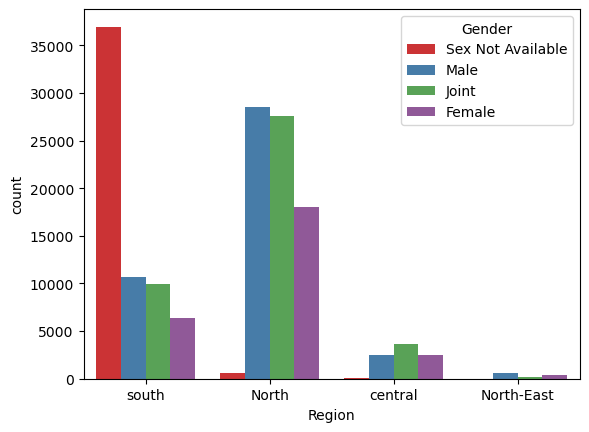

In [77]:
sns.countplot(data=loan_data, x='Region', hue='Gender', palette='Set1')

The south region had a significantly high percentage (approximately 57.7%) of entries marked as Sex Not Available.

In contrast, other regions had relatively low proportions of Sex Not Available, with consistent Male, Female, and Joint applicant ratios.

This disparity means that imputing these values with a single mode would not represent the actual diversity found in other regions. Additionally, since gender could potentially impact loan approval trends, preserving an accurate distribution is crucial for reliable modeling.

To handle these Sex Not Available values without introducing bias, we applied a probabilistic imputation approach. This approach leverages the observed gender distribution from other regions, where gender data is more complete and consistent, ensuring that imputed values reflect a realistic mix of gender categories across the dataset.

In [78]:
x = loan_data[(loan_data['Region'] != 'south') & (loan_data['Gender'] != 'Sex Not Available')]
probabilities = x['Gender'].value_counts(normalize=True)
loan_data['Gender'] = loan_data['Gender'].apply(lambda g: np.random.choice(probabilities.index, p=probabilities.values) if g == 'Sex Not Available' else g)

Missing Value Handling - Categorical Column Conclusion

After a thorough analysis of categorical columns with missing values, we determined that imputing with the most frequent class is the most reliable approach for maintaining data consistency. Columns with the highest missing values, such as loan_limit and approv_in_adv, were found to lack strong correlations with other features, justifying mode imputation for these columns.

For other categorical variables with fewer missing values, including loan_purpose, Neg_ammortization, age, and submission_of_application, we similarly applied mode imputation. This method preserves the original data distribution without introducing substantial bias.

Special Handling for Gender Column: The Gender column includes non-missing placeholders ("Sex Not Available") to denote unavailable data. To address these instances more accurately, we applied a probabilistic imputation technique providing a more efficient handling of missing gender data based on observed distribution patterns.

This imputation strategy across categorical columns ensures robust data preparation, enhancing the dataset's suitability for modeling without sacrificing interpretability.

In [79]:
loan_data[num_cols].isna().sum()

loan_amount             0
rate_of_interest    36438
Upfront_charges     39641
term                   41
property_value      15098
income               9144
Credit_Score            0
LTV                 15098
dtir1               24115
dtype: int64

We will impute the numerical columns with the median

In [105]:
loan_data[num_cols] = loan_data[num_cols].fillna(loan_data[num_cols].median())
loan_data[cat_missing] = loan_data[cat_missing].apply(lambda x: x.fillna(x.mode()[0]))

In [106]:
loan_data.isna().sum()

ID                           0
year                         0
loan_limit                   0
Gender                       0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
Credit_Worthiness            0
open_credit                  0
business_or_commercial       0
loan_amount                  0
rate_of_interest             0
Upfront_charges              0
term                         0
Neg_ammortization            0
interest_only                0
lump_sum_payment             0
property_value               0
occupancy_type               0
income                       0
credit_type                  0
Credit_Score                 0
co-applicant_credit_type     0
age                          0
submission_of_application    0
LTV                          0
Region                       0
Status                       0
dtir1                        0
dtype: int64

Feature Selection
Now, we will select the features for our model, which we would infer to be a part of the prediction.

For selecting the features, we use Pearson Correlation Coefficients for numerical features, and Chi-Square test of categorical variables. Thereafter, we will calculate the Mutual Information Scores. By analyising these results, we will then select a baseline set of features, which will be used to train our model. In the evaluation phase of the model, the refinement of feature selection is also planned.

First of all, we need to handle the missing values, and one-hot encode the categorical variables as we discussed above.

In [111]:
X = loan_data.drop(columns = 'Status').copy()
y = loan_data['Status'].copy()

In [115]:
from scipy import stats

num_df = X[num_cols]
pearson_dic = {i: stats.pearsonr(num_df[i], y) for i in num_df.columns}
pd.DataFrame(pearson_dic, index = ['Pearson Statistic', 'p-value']).T.sort_values(by='Pearson Statistic', ascending = False)

Pearson Statistic        p-value
LTV                        0.093702  4.572170e-287
dtir1                      0.082435  1.917735e-222
Credit_Score               0.003991   1.238070e-01
term                      -0.000204   9.372862e-01
loan_amount               -0.036810   9.479745e-46
rate_of_interest          -0.046748   1.049223e-72
income                    -0.060620  4.834221e-121
property_value            -0.080920  2.143661e-214
Upfront_charges           -0.095070  1.733033e-295

In [117]:
def chi_square_test(cat_var, target_var):
    # Create a contingency table
    contingency_table = pd.crosstab(X[cat_var], y)
    chi2, p, _, _ = stats.chi2_contingency(contingency_table)
    return chi2, p, contingency_table


chi_square_results = []


for col in cat_cols:
    chi2, p, contingency_table = chi_square_test(col, 'Status')
    chi_square_results.append({
        'Variable': col,
        'Chi2 Statistic': chi2,
        'P-Value': p,
        'Contingency Table': contingency_table
    })


chi_square_results_df = pd.DataFrame(chi_square_results)


chi_square_results_df.sort_values(by='Chi2 Statistic', ascending = False)

Variable  Chi2 Statistic        P-Value  \
12                credit_type    52134.590800   0.000000e+00   
10           lump_sum_payment     5237.722675   0.000000e+00   
8           Neg_ammortization     3609.067464   0.000000e+00   
13   co-applicant_credit_type     3092.481055   0.000000e+00   
15  submission_of_application     2227.159472   0.000000e+00   
3                   loan_type     1310.773839  2.339254e-285   
7      business_or_commercial     1273.623742  6.098142e-279   
1                      Gender      461.413105  6.388771e-101   
0                  loan_limit      422.613076   6.586936e-94   
16                     Region      380.241171   4.214889e-82   
14                        age      368.099896   2.003014e-76   
4                loan_purpose      240.196389   8.630523e-52   
2               approv_in_adv      207.314965   5.292757e-47   
5           Credit_Worthiness      179.827201   5.286272e-41   
11             occupancy_type      131.807043   2.390365e-29   
9               interest_only       28.487647   9.429822e-08   
6                 open_credit       14.427976   1.456228e-04   

                                    Contingency Table  
12  Status           0      1
credit_type         ...  
10  Status                 0      1
lump_sum_payme...  
8   Status                  0      1
Neg_ammortiza...  
13  Status                        0      1
co-appl...  
15  Status                         0      1
submis...  
3   Status         0      1
loan_type             ...  
7   Status                      0      1
business_...  
1   Status      0      1
Gender              
Fema...  
0   Status           0      1
loan_limit          ...  
16  Status          0      1
Region               ...  
14  Status      0     1
age                
25-34 ...  
4   Status            0      1
loan_purpose       ...  
2   Status             0      1
approv_in_adv     ...  
5   Status                  0      1
Credit_Worthi...  
11  Status               0      1
occupancy_type  ...  
9   Status              0      1
interest_only    ...  
6   Status            0      1
open_credit        ...

In [119]:
num_features = ['income', 'loan_amount', 'dtir1', 'LTV', 'property_value']


cat_features = ['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose', 
               'Credit_Worthiness', 'business_or_commercial', 'Neg_ammortization',
               'interest_only', 'lump_sum_payment', 'occupancy_type', 'credit_type',
               'co-applicant_credit_type', 'Region']

features = num_features + cat_features

income  loan_amount  dtir1        LTV  property_value loan_limit  \
0        1740.0       116500   45.0  98.728814        118000.0         cf   
1        4980.0       206500   39.0  75.135870        418000.0         cf   
2        9480.0       406500   46.0  80.019685        508000.0         cf   
3       11880.0       456500   42.0  69.376900        658000.0         cf   
4       10440.0       696500   39.0  91.886544        758000.0         cf   
...         ...          ...    ...        ...             ...        ...   
148665   7860.0       436500   48.0  71.792763        608000.0         cf   
148666   7140.0       586500   15.0  74.428934        788000.0         cf   
148667   6900.0       446500   49.0  61.332418        728000.0         cf   
148668   7140.0       196500   29.0  70.683453        278000.0         cf   
148669   7260.0       406500   44.0  72.849462        558000.0         cf   

        Gender approv_in_adv loan_type loan_purpose Credit_Worthiness  \
0       Female         nopre     type1           p1                l1   
1         Male         nopre     type2           p1                l1   
2         Male           pre     type1           p1                l1   
3         Male         nopre     type1           p4                l1   
4        Joint           pre     type1           p1                l1   
...        ...           ...       ...          ...               ...   
148665    Male         nopre     type1           p3                l1   
148666    Male         nopre     type1           p1                l1   
148667    Male         nopre     type1           p4                l1   
148668  Female         nopre     type1           p4                l1   
148669  Female         nopre     type1           p3                l1   

       business_or_commercial Neg_ammortization interest_only  \
0                       nob/c           not_neg       not_int   
1                         b/c           not_neg       not_int   
2                       nob/c           neg_amm       not_int   
3                       nob/c           not_neg       not_int   
4                       nob/c           not_neg       not_int   
...                       ...               ...           ...   
148665                  nob/c           not_neg       not_int   
148666                  nob/c           not_neg       not_int   
148667                  nob/c           not_neg       not_int   
148668                  nob/c           not_neg       not_int   
148669                  nob/c           not_neg       not_int   

       lump_sum_payment occupancy_type credit_type co-applicant_credit_type  \
0              not_lpsm             pr         EXP                      CIB   
1                  lpsm             pr        EQUI                      EXP   
2              not_lpsm             pr         EXP                      CIB   
3              not_lpsm             pr         EXP                      CIB   
4              not_lpsm             pr        CRIF                      EXP   
...                 ...            ...         ...                      ...   
148665         not_lpsm             pr         CIB                      EXP   
148666         not_lpsm             ir         CIB                      CIB   
148667         not_lpsm             pr         CIB                      EXP   
148668         not_lpsm             pr         EXP                      EXP   
148669         not_lpsm             pr         CIB                      CIB   

       Region  
0       south  
1       North  
2       south  
3       North  
4       North  
...       ...  
148665  south  
148666  south  
148667  North  
148668  North  
148669  North  

[148664 rows x 19 columns]

In [135]:
from sklearn.model_selection import train_test_split

X = loan_data[features].copy()
y = loan_data['Status']

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state = 42)

In [136]:
def to_csv(df, value):
    df.to_csv(f'{value}.csv', index = False)

to_csv(X_train, 'X_train')
to_csv(X_test, 'X_test')
to_csv(y_train, 'y_train')
to_csv(y_test, 'y_test')
to_csv(X, 'X')
to_csv(y, 'y')